<a href="https://colab.research.google.com/github/ApahSaroj/WQC/blob/main/wpi_class_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd                                       # DataFrames and plotting
import pandas.plotting as pd_plot                         # Matrix scatter plots
import numpy as np                                        # Arrays and matrix math
from sklearn.decomposition import PCA                     # PCA program from scikit learn (package for machine learning)
from sklearn.preprocessing import StandardScaler          # Standardize variables to mean of 0.0 and variance of 1.0
import matplotlib.pyplot as plt                           # Used in visualization
from matplotlib.colors import ListedColormap              # Color in the plot
from sklearn.model_selection import train_test_split      # Data split
from sklearn.preprocessing import StandardScaler          # For standardization
from sklearn.metrics import confusion_matrix              # Obtain confusion matrix of classification model
from sklearn.metrics import accuracy_score                # Obtain accuracy 
from sklearn.metrics import mean_squared_error            # SCORERSpecific measures to check our models

In [67]:
def plot_corr(dataframe,size=12):                         # Plot a graphical correlation matrix 
    corr = dataframe.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    im = ax.matshow(corr,vmin = -1.0, vmax = 1.0)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    plt.colorbar(im, orientation = 'vertical')
    plt.title('Correlation Matrix')
# function from Professor Michael Pyrcz,https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_PCA.ipynb 
    
def classification_visualize(X_set_train, y_set_train, X_set_test, y_set_test, classifier, model = 'Logistic Regression'):
    fig, axs = plt.subplots(1,2, figsize=(12,5))
    X1_train, X2_train = np.meshgrid(np.arange(start = X_set_train[:, 0].min() - 1, stop = X_set_train[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set_train[:, 1].min() - 1, stop = X_set_train[:, 1].max() + 1, step = 0.1))
    axs[0].contourf(X1_train, X2_train, classifier.predict(np.array([X1_train.ravel(), X2_train.ravel()]).T).reshape(X1_train.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green', 'blue')))
    for i, j in enumerate(np.unique(y_set_train)):
        axs[0].scatter(X_set_train[y_set_train == j, 0], X_set_train[y_set_train == j, 1],marker='o',edgecolor='black',
                c = ListedColormap(('red', 'blue'))(i), label = j)   
    axs[0].set_ylim(X2_train.min(), X2_train.max())   
    axs[0].set_xlim(X1_train.min(), X1_train.max())
    axs[0].set_title(model+ '(Train set)')
    axs[0].set_xlabel('PC1')
    axs[0].set_ylabel('PC2')
    axs[0].legend()

    X1_test, X2_test = np.meshgrid(np.arange(start = X_set_test[:, 0].min() - 1, stop = X_set_test[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set_test[:, 1].min() - 1, stop = X_set_test[:, 1].max() + 1, step = 0.1))
    axs[1].contourf(X1_test, X2_test, classifier.predict(np.array([X1_test.ravel(), X2_test.ravel()]).T).reshape(X1_test.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green', 'blue')))
    axs[1].set_xlim(X1_test.min(), X1_test.max())
    axs[1].set_ylim(X2_test.min(), X2_test.max())
    for i, j in enumerate(np.unique(y_set_test)):
        axs[1].scatter(X_set_test[y_set_test == j, 0], X_set_test[y_set_test== j, 1],marker='o',edgecolor='black',
                c = ListedColormap(('red', 'blue'))(i), label = j)
    axs[1].set_title(model+ ' (Test set)')
    axs[1].set_xlabel('PC1')
    axs[1].set_ylabel('PC2')
    axs[1].legend()
    plt.show()

In [68]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
df = pd.read_excel('/content/drive/MyDrive/DATA/WQC_test.xlsx')
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df.drop('WQC', inplace=True, axis=1)

pho = df['Phosphate']
pho

for i in range(len(pho)):
    if i>5:
        if np.isnan(pho[i]):
                pho[i] = np.mean([pho[i-1], pho[i-2], pho[i-3], pho[i-4], pho[i-5]])
pho

for i in range(4,-1,-1):
    if np.isnan(pho[i]):
            pho[i] = np.mean([pho[i+1], pho[i+2], pho[i+3], pho[i+4], pho[i+5]])
df

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528
1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400
2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814
3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.60,0.299590,2.238750,0.01536,0.219282
4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,7.60,5.6,224.0,8.0,370.0,16.14,92.0,24.0,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630
483,7.30,5.6,266.0,96.0,434.0,20.56,96.0,32.0,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996
484,5.10,5.8,290.0,12.0,487.0,37.35,60.0,44.0,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811
485,7.40,6.4,230.0,72.0,385.0,20.06,70.0,42.0,10.35,1.360,32.92,7.110435,48.500000,0.21900,0.509970


In [70]:
num = df._get_numeric_data()                  # Get the values of data       
num[num < 0] = 0                              # Truncate negative values to zeros 
df.describe().transpose()             # Describe the data

,count,mean,std,min,25%,50%,75%,max
pH,487.0,7.809275,0.411216,5.100000,7.560000,7.860000,8.100000,8.570000
DO,487.0,7.441561,1.107170,4.200000,6.700000,7.400000,8.100000,13.500000
TDS,487.0,115.752156,47.283961,56.000000,84.000000,102.000000,129.000000,308.000000
Alkalinity,487.0,62.225873,20.068358,8.000000,50.000000,56.000000,72.000000,170.000000
EC,487.0,196.536591,81.088229,98.000000,140.000000,171.000000,219.500000,502.000000
Na,487.0,8.906119,5.719637,2.190000,5.295000,7.100000,10.235000,48.350000
Ca,487.0,43.683778,17.846355,14.000000,32.000000,40.000000,52.000000,146.000000
Mg,487.0,24.361396,10.815360,2.000000,16.000000,22.000000,28.000000,84.000000
K,487.0,3.036222,2.304195,0.500000,1.735000,2.410000,3.400000,18.020000
F,487.0,0.511795,0.494124,0.059000,0.249000,0.312000,0.468000,3.060000


In [71]:
df['cWPI'] = np.where(df['WPI']>=0.5, 1, 0)    # Assigne high WPI as 1 and low WPI as 0

In [72]:
df = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,15]]          # Use columns 0-13 and 15
df.describe().transpose()                # Describe the data

,count,mean,std,min,25%,50%,75%,max
pH,487.0,7.809275,0.411216,5.100000,7.560000,7.860000,8.100000,8.570000
DO,487.0,7.441561,1.107170,4.200000,6.700000,7.400000,8.100000,13.500000
TDS,487.0,115.752156,47.283961,56.000000,84.000000,102.000000,129.000000,308.000000
Alkalinity,487.0,62.225873,20.068358,8.000000,50.000000,56.000000,72.000000,170.000000
EC,487.0,196.536591,81.088229,98.000000,140.000000,171.000000,219.500000,502.000000
Na,487.0,8.906119,5.719637,2.190000,5.295000,7.100000,10.235000,48.350000
Ca,487.0,43.683778,17.846355,14.000000,32.000000,40.000000,52.000000,146.000000
Mg,487.0,24.361396,10.815360,2.000000,16.000000,22.000000,28.000000,84.000000
K,487.0,3.036222,2.304195,0.500000,1.735000,2.410000,3.400000,18.020000
F,487.0,0.511795,0.494124,0.059000,0.249000,0.312000,0.468000,3.060000


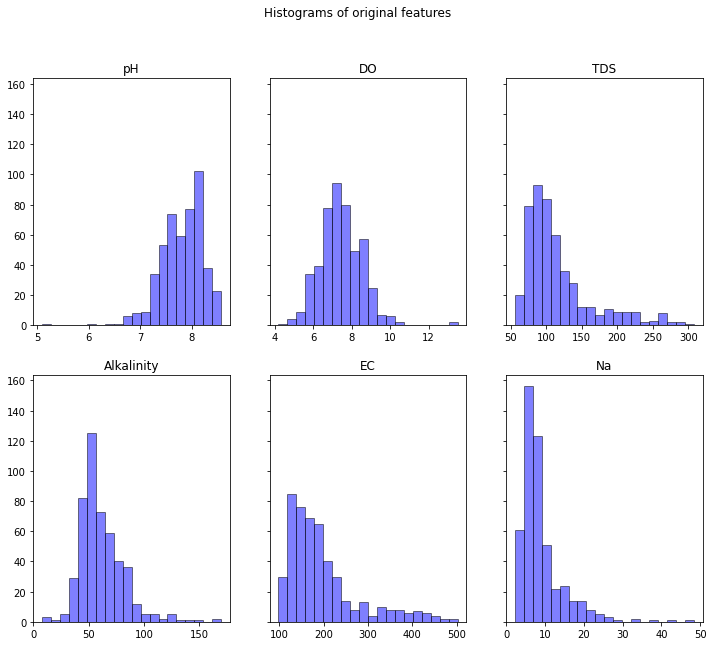

In [73]:
X = df.iloc[:, :-1].values              # Obtain X values 
y = df.iloc[:, -1].values               # Obtain y values
f, axs = plt.subplots(2, 3, sharey=True, figsize=(12,10))
axs[0,0].hist(X[:,0], alpha = 0.5, color = 'blue', edgecolor = 'black', bins=20); axs[0,0].set_title('pH'); 
axs[0,1].hist(X[:,1], alpha = 0.5, color = 'blue', edgecolor = 'black', bins=20); axs[0,1].set_title('DO'); 
axs[0,2].hist(X[:,2], alpha = 0.5, color = 'blue', edgecolor = 'black', bins=20); axs[0,2].set_title('TDS'); 
axs[1,0].hist(X[:,3], alpha = 0.5, color = 'blue', edgecolor = 'black', bins=20); axs[1,0].set_title('Alkalinity');
axs[1,1].hist(X[:,4], alpha = 0.5, color = 'blue', edgecolor = 'black', bins=20); axs[1,1].set_title('EC'); 
axs[1,2].hist(X[:,5], alpha = 0.5, color = 'blue', edgecolor = 'black', bins=20); axs[1,2].set_title('Na');
f.suptitle('Histograms of original features') 
plt.show()

In [74]:
corr_matrix = np.corrcoef(df, rowvar = False)             # Obtain the correlation matrix
print(np.around(corr_matrix,3))                           # print the correlation matrix

[[ 1.     0.211 -0.237  0.176 -0.243 -0.273 -0.104 -0.062 -0.345 -0.226
  -0.293 -0.397 -0.386 -0.04   0.034]
 [ 0.211  1.    -0.225 -0.038 -0.229 -0.183 -0.186 -0.07  -0.27  -0.233
  -0.178 -0.142 -0.293  0.065 -0.033]
 [-0.237 -0.225  1.     0.638  0.985  0.833  0.892  0.706  0.755  0.744
   0.841  0.54   0.832  0.079  0.275]
 [ 0.176 -0.038  0.638  1.     0.615  0.381  0.696  0.659  0.29   0.361
   0.384  0.095  0.23  -0.025  0.141]
 [-0.243 -0.229  0.985  0.615  1.     0.821  0.88   0.688  0.745  0.732
   0.826  0.535  0.834  0.093  0.279]
 [-0.273 -0.183  0.833  0.381  0.821  1.     0.634  0.5    0.709  0.633
   0.974  0.48   0.661  0.106  0.259]
 [-0.104 -0.186  0.892  0.696  0.88   0.634  1.     0.586  0.587  0.624
   0.635  0.415  0.73   0.041  0.283]
 [-0.062 -0.07   0.706  0.659  0.688  0.5    0.586  1.     0.463  0.562
   0.526  0.277  0.539  0.006  0.143]
 [-0.345 -0.27   0.755  0.29   0.745  0.709  0.587  0.463  1.     0.634
   0.728  0.601  0.705  0.066  0.174]
 [-0.226 -

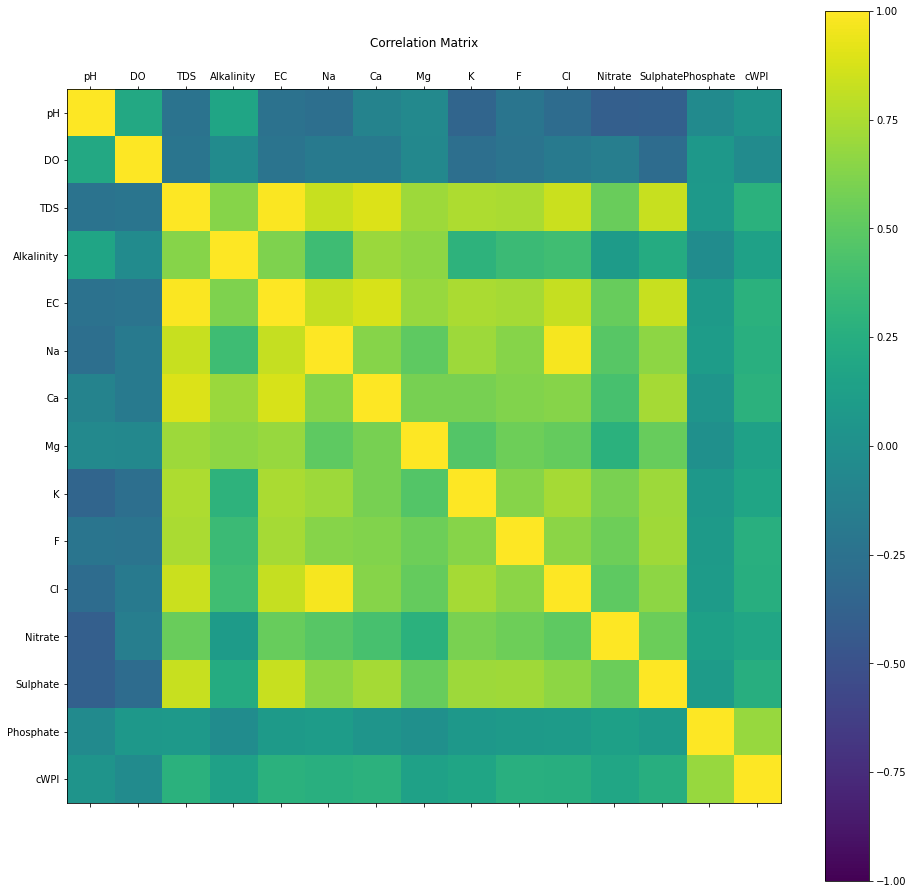

In [75]:
plot_corr(df,16)                                      # Plot the correlation matrix
plt.show()

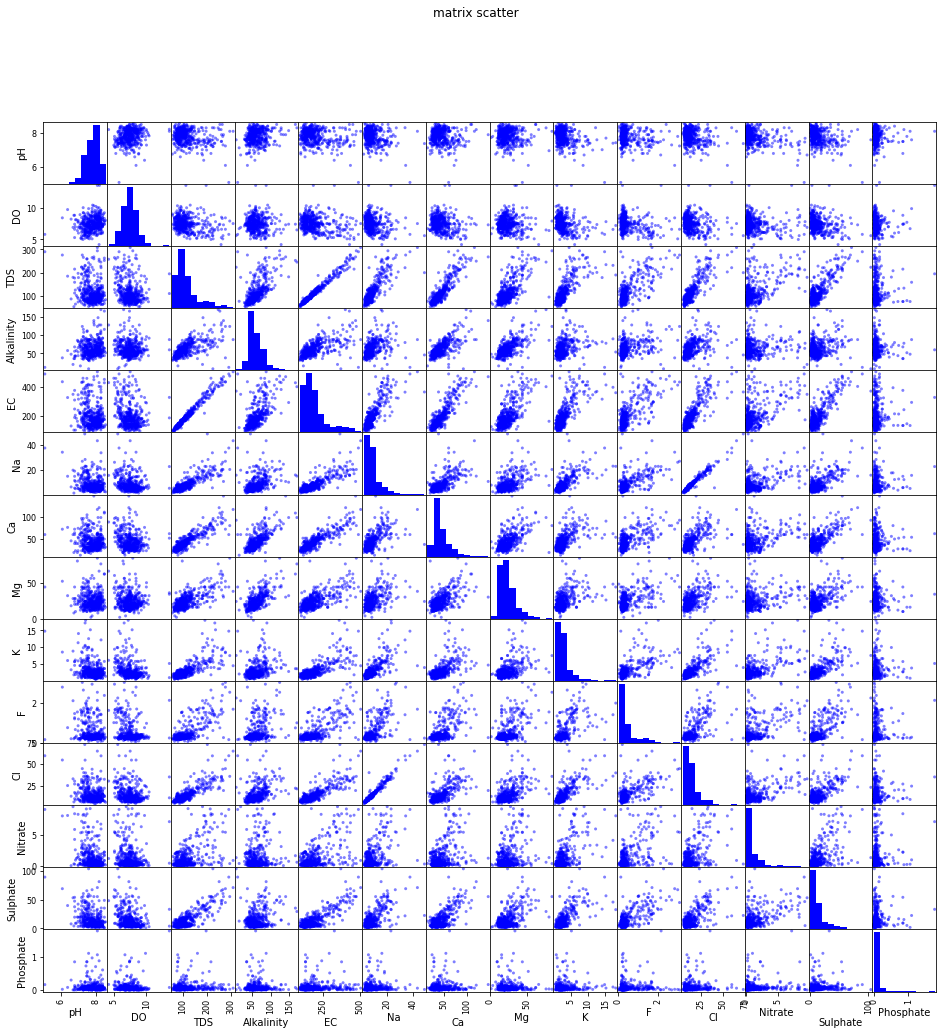

In [76]:
pd_plot.scatter_matrix(df.iloc[:,0:14],alpha = 0.5,figsize=(16, 16),color = 'blue', hist_kwds={'color':['blue']}) # pandas matrix scatter plot
plt.suptitle('matrix scatter')
plt.show()

In [77]:
sc = StandardScaler()                     #standardize the features
X_sc = sc.fit_transform(X)

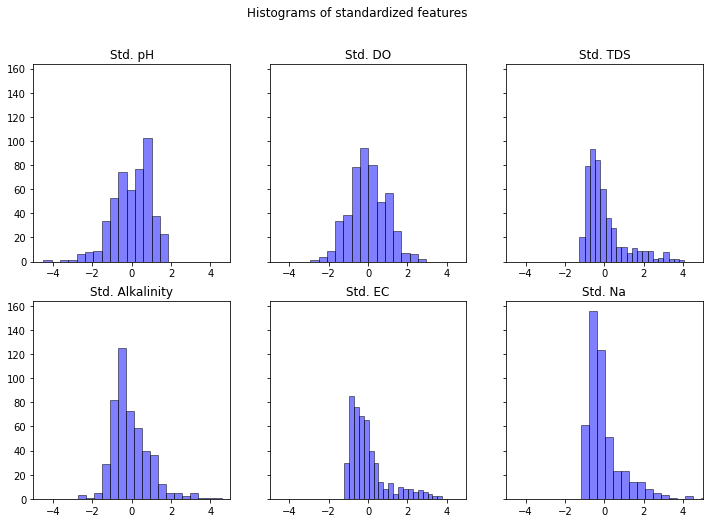

In [78]:
f, axs = plt.subplots(2, 3, sharey=True, figsize=(12,8))
f.suptitle('Histograms of standardized features') 
axs[0,0].hist(X_sc[:,0], alpha = 0.5, color = 'blue', edgecolor = 'black', bins=20); axs[0,0].set_title('Std. pH'); axs[0,0].set_xlim(-5,5)
axs[0,1].hist(X_sc[:,1], alpha = 0.5, color = 'blue', edgecolor = 'black', bins=20); axs[0,1].set_title('Std. DO'); axs[0,1].set_xlim(-5,5)
axs[0,2].hist(X_sc[:,2], alpha = 0.5, color = 'blue', edgecolor = 'black', bins=20); axs[0,2].set_title('Std. TDS'); axs[0,2].set_xlim(-5,5)
axs[1,0].hist(X_sc[:,3], alpha = 0.5, color = 'blue', edgecolor = 'black', bins=20); axs[1,0].set_title('Std. Alkalinity');axs[1,0].set_xlim(-5,5)
axs[1,1].hist(X_sc[:,4], alpha = 0.5, color = 'blue', edgecolor = 'black', bins=20); axs[1,1].set_title('Std. EC');axs[1,1].set_xlim(-5,5) 
axs[1,2].hist(X_sc[:,5], alpha = 0.5, color = 'blue', edgecolor = 'black', bins=20); axs[1,2].set_title('Std. Na'); axs[1,2].set_xlim(-5,5)
plt.show()

In [79]:
pca = PCA(n_components = 2)                   #Reduce dimensional to 2
X_PCA = pca.fit_transform(X_sc)
print(X_PCA)

[[-1.94389878e+00 -6.49928257e-01]
 [-5.08141102e-02 -1.14679144e+00]
 [-1.61520160e+00  8.38868252e-01]
 [-2.02312711e+00 -9.13323222e-01]
 [-1.88938437e+00  8.18022828e-01]
 [-1.17639259e+00 -6.16076229e-01]
 [ 1.12657589e+00  7.27069643e-01]
 [-8.97088368e-01  6.96422083e-01]
 [-1.25410449e+00 -4.61296685e-01]
 [ 6.47617200e-02 -4.13812921e-02]
 [-1.17606301e+00 -1.06273542e+00]
 [-2.04269646e+00 -4.04258518e-01]
 [-2.12418467e+00  7.71008956e-01]
 [-1.98387601e+00  3.69107195e-01]
 [ 1.02152352e+01 -1.61780765e+00]
 [-1.06272134e+00  5.68053563e-01]
 [ 8.07784280e-01 -7.23914163e-01]
 [ 8.07784280e-01 -7.23914163e-01]
 [ 3.02996594e-01 -2.09074359e-01]
 [ 2.91851911e-01 -2.23230795e+00]
 [-1.26326791e+00 -3.60215550e-01]
 [-2.75515392e-01 -5.94958232e-02]
 [-1.73823761e-01 -2.70988283e-01]
 [-5.22864755e-01 -1.28493632e-01]
 [-4.07997855e-01  6.01606277e-03]
 [-1.43721230e+00 -4.92476562e-01]
 [-8.14252166e-01  9.58082618e-01]
 [-5.72563220e-01  1.01792598e+00]
 [-2.24927383e+00 -6

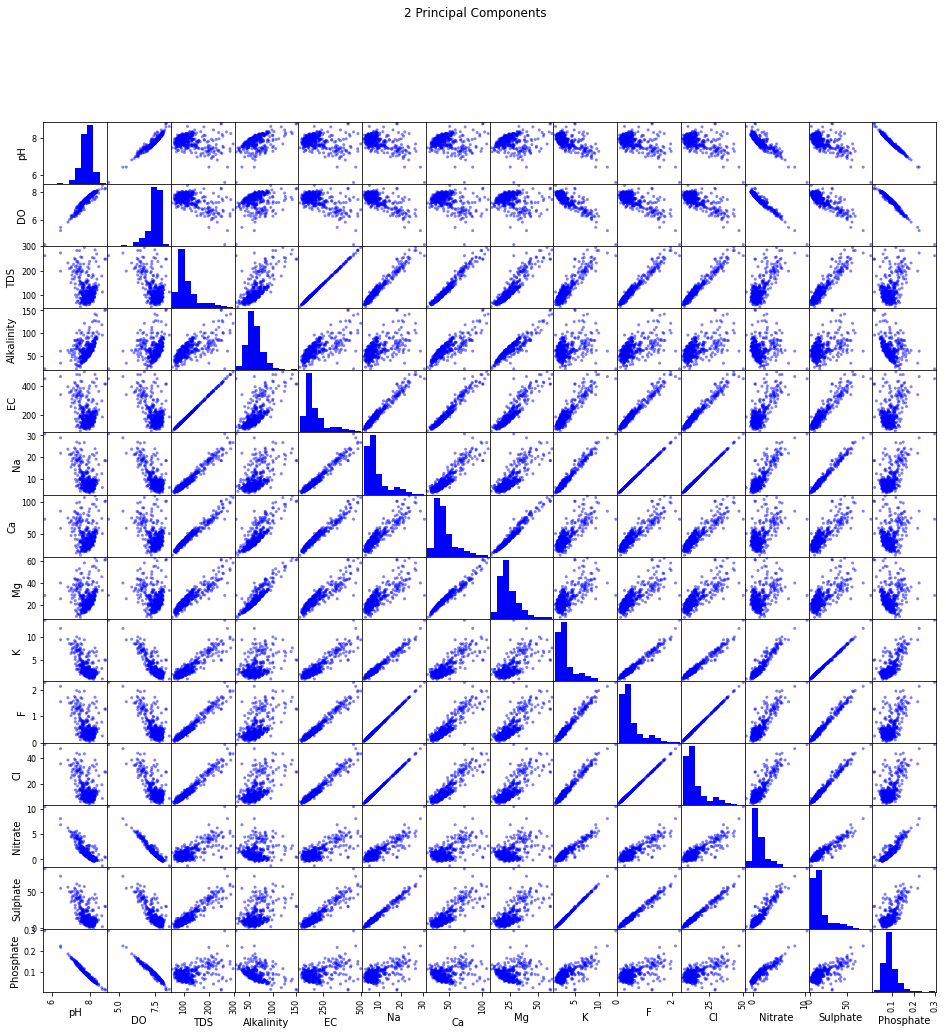

In [80]:
features = ['pH','DO',	'TDS',	'Alkalinity',	'EC',	'Na',	'Ca',	'Mg',	'K',	'F',	'Cl',	'Nitrate',	'Sulphate',	'Phosphate']
mu = np.mean(X, axis=0)
sd = np.std(X, axis=0)
xhat = np.dot(pca.transform(X_sc)[:,:2], pca.components_[:2,:])
xhat = sd*xhat + mu
df_2d = pd.DataFrame(data=xhat,columns=features)                     
#Above calculation is from rofessor Michael Pyrcz,https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_PCA.ipynb 
pd_plot.scatter_matrix(df_2d,alpha = 0.5,figsize=(16, 16),color = 'blue', hist_kwds={'color':['blue']})
plt.suptitle('2 Principal Components')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


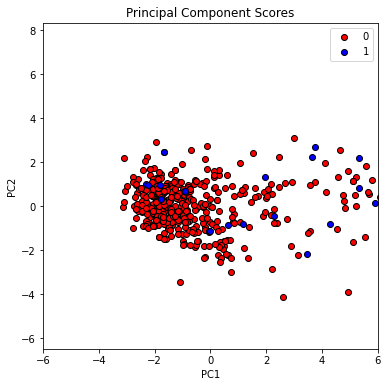

In [81]:
plt.subplots(1, 1,  figsize=(6,6))
for i, j in enumerate(np.unique(y)):
    plt.scatter(X_PCA[y == j, 0], X_PCA[y == j, 1],marker='o',edgecolor='black',
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.legend()
plt.xlabel('PC1')
plt.xlim([-6,6])
plt.ylabel('PC2')
plt.title('Principal Component Scores')
plt.show()

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_PCA,y,test_size = 0.2, random_state = 0) #Data split

(-5.0, 5.0)

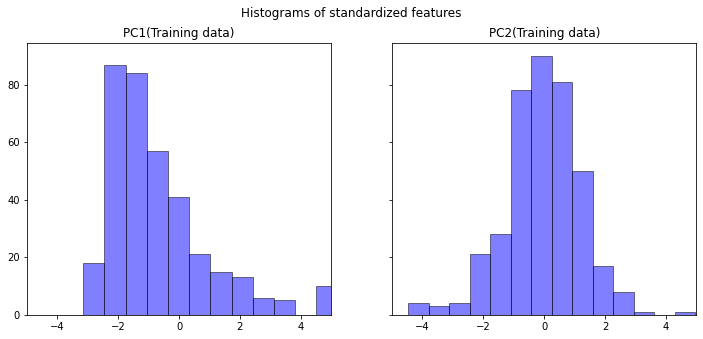

In [83]:
f, axs = plt.subplots(1, 2, sharey=True, figsize=(12,5))
f.suptitle('Histograms of standardized features') 
axs[0].hist(X_train[:,0], alpha = 0.5, color = 'blue', edgecolor = 'black', bins=20); axs[0].set_title('PC1(Training data)'); axs[0].set_xlim(-5,5)
axs[1].hist(X_train[:,1], alpha = 0.5, color = 'blue', edgecolor = 'black', bins=20); axs[1].set_title('PC2(Training data)'); axs[1].set_xlim(-5,5)

In [84]:
accuracy_score_all= np.zeros(8)              #generate an array for colleting the accurace score of all models to check the goodness of the model

In [85]:
from sklearn.linear_model import LogisticRegression           # For logistic regression
classifier_lin = LogisticRegression(random_state = 0)
classifier_lin.fit(X_train, y_train)                        #Train the model from training data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
y_pred_lin = classifier_lin.predict(X_test)                      # Predict the testing data

In [87]:
cm = confusion_matrix(y_test, y_pred_lin)                        # Obtain the confusion matrix
print(cm)                                                        # Print the confusion matrix
accuracy_score_logistic = accuracy_score(y_test, y_pred_lin)     # Obtain the accurate score of the model
print('The accuracy score is:' + str(accuracy_score_logistic))                                   # Print the accurate score
accuracy_score_all[0] =(accuracy_score_logistic)               # Add the accurate score into the collection array
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lin, labels=[0,1]))   #Obtain the table of model performance summary

[[91  1]
 [ 5  1]]
The accuracy score is:0.9387755102040817
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        92
           1       0.50      0.17      0.25         6

    accuracy                           0.94        98
   macro avg       0.72      0.58      0.61        98
weighted avg       0.92      0.94      0.92        98



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

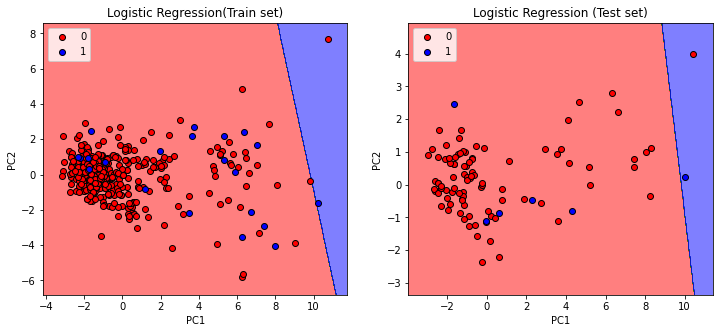

In [88]:
classification_visualize(X_train, y_train, X_test, y_test, classifier_lin, model = 'Logistic Regression') #using classification_visualize function

**K-Nearest Neighbors (KNN)**

In [89]:
from sklearn.neighbors import KNeighborsClassifier                  # For KNN
mse_test = np.zeros(10)                                             # To collect MSE
for i in range (1,11):                                              #Tune the hyperparameter
    classifier_knn = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski', p = 2)
    classifier_knn.fit(X_train, y_train)                            # Train the model from training data
    mse_test[i-1] = mean_squared_error(y_test, classifier_knn.predict(X_test))  #Collect MSE
(min_mse,n_nei) = min((v,i) for i,v in enumerate(mse_test))
print (min_mse,n_nei)
n_neighbors = n_nei + 1                                             # Obtain the number of neighbors to minimize the MSE
print('Number of neighbors is:' + str(n_neighbors))

0.061224489795918366 5
Number of neighbors is:6


In [90]:
classifier_knn = KNeighborsClassifier(n_neighbors = n_neighbors, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train, y_train)                             # Train the model from training data

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [91]:
y_pred_knn = classifier_knn.predict(X_test)                      # Predict the testing data

In [92]:
cm = confusion_matrix(y_test, y_pred_knn)                        # Obtain the confusion matrix
print(cm)                                                        # Print the confusion matrix
accuracy_score_knn = accuracy_score(y_test, y_pred_knn)          # Obtain the accurate score of the model
print(accuracy_score_knn)                                        # Print the accurate score
accuracy_score_all[1] =(accuracy_score_knn)                      # Add the accurate score into the collection array
print(classification_report(y_test, y_pred_knn, labels=[0,1]))   #Obtain the table of model performance summary

[[92  0]
 [ 6  0]]
0.9387755102040817
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        92
           1       0.00      0.00      0.00         6

    accuracy                           0.94        98
   macro avg       0.47      0.50      0.48        98
weighted avg       0.88      0.94      0.91        98



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

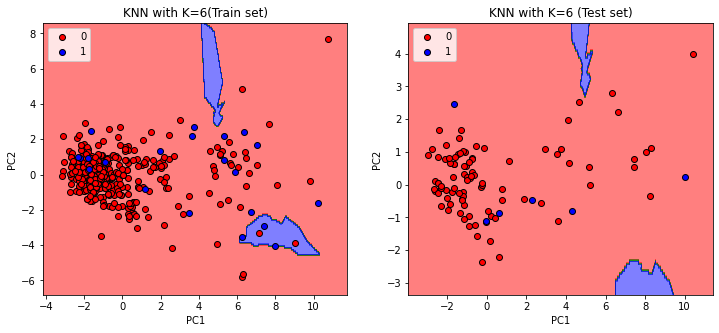

In [93]:
classification_visualize(X_train, y_train, X_test, y_test, classifier_knn, model = 'KNN with K='+str(n_neighbors))  #using classification_visualize function

***The accuracy of this KNN model is 0.93 for 6 neighbors. similar to logistic model.***

**Support Vector Machine (SVM) -- linear**

In [94]:
from sklearn.svm import SVC                                           # For SVM
c= [0.1,1,10]                                                         # Testing C from 0.1, 1, and 10
mse_test = np.zeros(3)
for i in range (0,3):                                                 #Tune the hyperparameter
    classifier_svm = SVC(kernel = 'linear', random_state = 0, C=c[i])
    classifier_svm.fit(X_train, y_train)                              # Train the model from training data
    mse_test[i] = mean_squared_error(y_test, classifier_svm.predict(X_test)) #Collect the MSE
(min_mse,i) = min((v,i) for i,v in enumerate(mse_test))
print (min_mse,i)
C= c[i]                                                              # Obtain the optimum C
print('C='+str(C))

0.061224489795918366 0
C=0.1


In [95]:
classifier_svm = SVC(kernel = 'linear', random_state = 0,C=C)
classifier_svm.fit(X_train, y_train)                             #Train the model from training data

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [96]:

y_pred_svm = classifier_svm.predict(X_test)                      # Predict the testing data

In [97]:
cm = confusion_matrix(y_test, y_pred_svm)                        # Obtain the confusion matrix
print(cm)                                                        # Print the confusion matrix
accuracy_score_svm = accuracy_score(y_test, y_pred_svm)          # Obtain the accurate score of the model
print(accuracy_score_svm)                                        # Print the accurate score
accuracy_score_all[2]=(accuracy_score_svm)                       # Add the accurate score into the collection array
print(classification_report(y_test, y_pred_svm, labels=[0,1]))   #Obtain the table of model performance summary

[[92  0]
 [ 6  0]]
0.9387755102040817
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        92
           1       0.00      0.00      0.00         6

    accuracy                           0.94        98
   macro avg       0.47      0.50      0.48        98
weighted avg       0.88      0.94      0.91        98



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

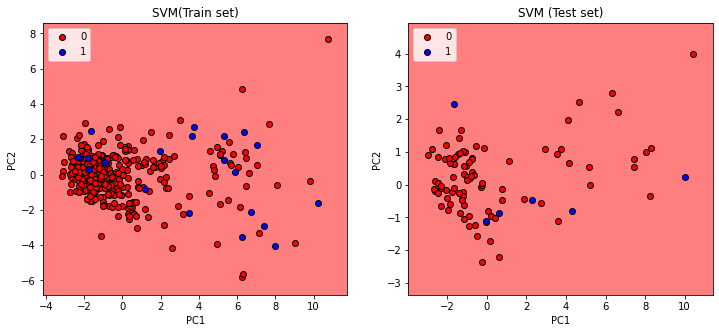

In [98]:
classification_visualize(X_train, y_train, X_test, y_test, classifier_svm, model = 'SVM')  #using classification_visualize function

**Kernel SVM -- ploy**

In [99]:
C_range= [0.1,1,10,100]                            # Test C from 0.1, 1, 10 and 100
degree_range = [2,3,4,5]                           # Test degree from 2, 3, 4 and 5
mse_test = np.zeros(16)
i = 0                                              # Tune the hyperparameter
for C in C_range:
    for degree in degree_range:
        classifier_svm_poly = SVC(kernel = 'poly',C=C, degree=degree)
        classifier_svm_poly.fit(X_train,y_train)
        mse_test[i] = mean_squared_error(y_test, classifier_svm_poly.predict(X_test))
        i = i+1

(min_mse,i) = min((v,i) for i,v in enumerate(mse_test))
print (min_mse,i)                          # Obtain the minimum MSE
C= C_range[i//4]                           # Obtain the corresponding C
degree= degree_range[i%4]                  # Obtian the corresponding degress
print ('c=' +str(C))
print ('degree = '+str(degree))

0.061224489795918366 0
c=0.1
degree = 2


In [100]:
classifier_svm_poly = SVC(kernel = 'poly',C=C, degree=degree)
classifier_svm_poly.fit(X_train,y_train)                             #Train the model from training data

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [101]:
y_pred_svm_poly = classifier_svm_poly.predict(X_test)                      # Predict the testing data

In [102]:
cm_ksvm = confusion_matrix(y_test, y_pred_svm_poly)                    # Obtain the confusion matrix
print(cm)                                                              # Print the confusion matrix
accuracy_score_svm_poly = accuracy_score(y_test, y_pred_svm_poly)      # Obtain the accurate score of the model
print(accuracy_score_svm_poly)                                         # Print the accurate score
accuracy_score_all[3]=(accuracy_score_svm_poly)                        # Add the accurate score into the collection array
print(classification_report(y_test, y_pred_svm_poly, labels=[0,1]))    #Obtain the table of model performance summary

[[92  0]
 [ 6  0]]
0.9387755102040817
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        92
           1       0.00      0.00      0.00         6

    accuracy                           0.94        98
   macro avg       0.47      0.50      0.48        98
weighted avg       0.88      0.94      0.91        98



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

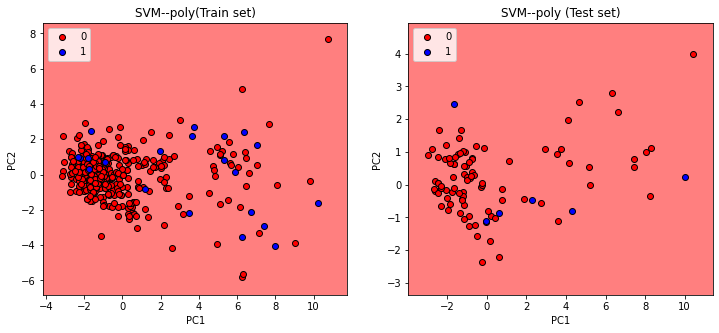

In [103]:
classification_visualize(X_train, y_train, X_test, y_test, classifier_svm_poly, model = 'SVM--poly')  #using classification_visualize function

**Kernel SVM --rbf**

In [104]:
C_range = [0.1,1,10,100]                           # Test C from 0.1, 1, 10 and 100
gamma_range = [0.01,1,10,100]                      # Test gamma from 0.1 1, 10 and 100
mse_test = np.zeros(16)
i = 0
for C in C_range:                                  # Tune the hyperparameter
    for gamma in gamma_range:   
        classifier_svm_rbf = SVC(kernel = 'rbf',C=C, gamma=gamma)
        classifier_svm_rbf.fit(X_train,y_train)
        mse_test[i] = mean_squared_error(y_test, classifier_svm_rbf.predict(X_test))
        i = i+1

(min_mse,i) = min((v,i) for i,v in enumerate(mse_test))
print (min_mse,i)                         # Obtian the min MSE
C= C_range[i//4]                          # Obtain the corresponding C
gamma= gamma_range[i%4]                   # Obtian the corresponding degress
print ('c=' +str(C))
print ('gamma = '+str(gamma))

0.05102040816326531 6
c=1
gamma = 10


In [105]:
classifier_svm_rbf = SVC(kernel = 'rbf', random_state = 0,C=C,gamma =gamma)
classifier_svm_rbf.fit(X_train, y_train)                              #Train the model from training data

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [106]:
y_pred_svm_rbf = classifier_svm_rbf.predict(X_test)                      # Predict the testing data

In [107]:
cm_ksvm = confusion_matrix(y_test, y_pred_svm_rbf)                    # Obtain the confusion matrix
print(cm)                                                             # Print the confusion matrix
accuracy_score_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf)       # Obtain the accurate score of the model
print(accuracy_score_svm_rbf)                                         # Print the accurate score
accuracy_score_all[4]=(accuracy_score_svm_rbf)                        # Add the accurate score into the collection array
print(classification_report(y_test, y_pred_svm_rbf, labels=[0,1]))    # Obtain the table of model performance summary

[[92  0]
 [ 6  0]]
0.9489795918367347
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        92
           1       1.00      0.17      0.29         6

    accuracy                           0.95        98
   macro avg       0.97      0.58      0.63        98
weighted avg       0.95      0.95      0.93        98



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

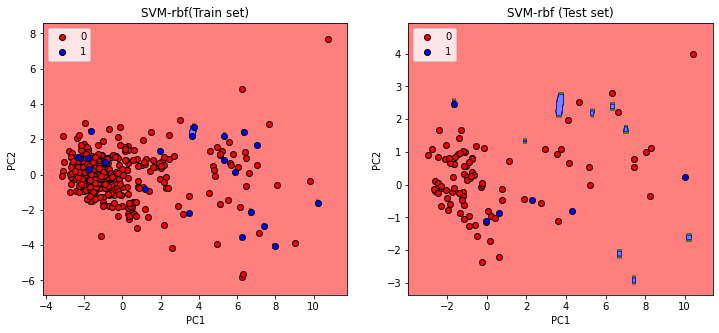

In [108]:
classification_visualize(X_train, y_train, X_test, y_test, classifier_svm_rbf, model = 'SVM-rbf')  #using classification_visualize function

**Decision Tree Classification**

In [109]:
from sklearn.tree import DecisionTreeClassifier                    # For Decision tree 
cretia = ['gini', 'entropy']                                       # Choose from gini and entropy
mse_test = np.zeros(2)
for i in range (0,2):                                              # Tune the hyperparameter
    classifier_dec = DecisionTreeClassifier(criterion = cretia[i], random_state = 0)
    classifier_dec.fit(X_train, y_train)                            # Train the model from training data
    mse_test[i] = mean_squared_error(y_test, classifier_dec.predict(X_test))
(min_mse,i) = min((v,i) for i,v in enumerate(mse_test))
print (min_mse,i)                                                   # Obtain the min MSE
criterion = cretia[i]                                               # Obtain the corresponding cretia 
print('Criterion is: '+ criterion)

0.09183673469387756 1
Criterion is: entropy


In [110]:
classifier_dec = DecisionTreeClassifier(criterion = cretia[i], random_state = 0)
classifier_dec.fit(X_train, y_train)                              #Train the model from training data

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [111]:
y_pred_dec = classifier_dec.predict(X_test)                      # Predict the testing data

In [112]:
cm = confusion_matrix(y_test, y_pred_dec)                        # Obtain the confusion matrix
print(cm)                                                        # Print the confusion matrix
accuracy_score_dec = accuracy_score(y_test, y_pred_dec)          # Obtain the accurate score of the model
print(accuracy_score_dec)                                        # Print the accurate score
accuracy_score_all[5]=(accuracy_score_dec)                    # Add the accurate score into the collection array
print(classification_report(y_test, y_pred_dec, labels=[0,1]))   #Obtain the table of model performance summary

[[87  5]
 [ 4  2]]
0.9081632653061225
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        92
           1       0.29      0.33      0.31         6

    accuracy                           0.91        98
   macro avg       0.62      0.64      0.63        98
weighted avg       0.92      0.91      0.91        98



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

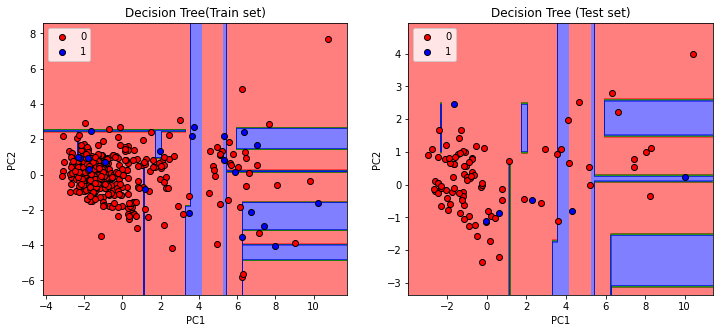

In [113]:
classification_visualize(X_train, y_train, X_test, y_test, classifier_dec, model = 'Decision Tree')   #using classification_visualize function

**Naive Bayes Classification**

In [114]:
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(X_train, y_train)                              #Train the model from training data

GaussianNB(priors=None, var_smoothing=1e-09)

In [115]:
y_pred_NB = classifier_NB.predict(X_test)                        # Predict the testing data

In [116]:
cm = confusion_matrix(y_test, y_pred_dec)                        # Obtain the confusion matrix
print(cm)                                                        # Print the confusion matrix
accuracy_score_NB = accuracy_score(y_test, y_pred_NB)            # Obtain the accurate score of the model
print(accuracy_score_NB)                                         # Print the accurate score
accuracy_score_all[6]=(accuracy_score_NB)                     # Add the accurate score into the collection array
print(classification_report(y_test, y_pred_NB, labels=[0,1]))   #Obtain the table of model performance summary

[[87  5]
 [ 4  2]]
0.8673469387755102
              precision    recall  f1-score   support

           0       0.94      0.91      0.93        92
           1       0.11      0.17      0.13         6

    accuracy                           0.87        98
   macro avg       0.53      0.54      0.53        98
weighted avg       0.89      0.87      0.88        98



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

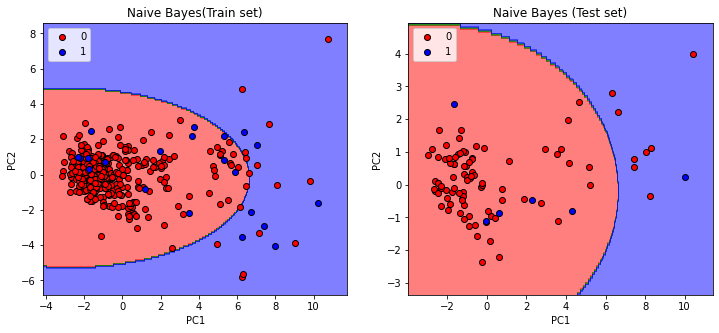

In [117]:
classification_visualize(X_train, y_train, X_test, y_test, classifier_NB, model = 'Naive Bayes')  #using classification_visualize function

**Radom Forest Classification**

In [118]:
from sklearn.ensemble import RandomForestClassifier
mse_test = np.zeros(10)
for i in range (1,11):                                             #Tune the hyperparameter
    classifier_RF = RandomForestClassifier(n_estimators = i, criterion = 'gini', random_state = 0)
    classifier_RF.fit(X_train, y_train)                            # Train the model from training data
    mse_test[i-1] = mean_squared_error(y_test, classifier_RF.predict(X_test))
(min_mse,n) = min((v,i) for i,v in enumerate(mse_test))
print (min_mse,n)                                                   # Obtain the min MSE
n_estimators = n + 1
print('Number of estimators is:'+str(n_estimators))                 # Obtain the corresponding number of estimators

0.07142857142857142 5
Number of estimators is:6


In [119]:
classifier_RF = RandomForestClassifier(n_estimators = n_estimators, criterion = 'gini', random_state = 0)
classifier_RF.fit(X_train, y_train)                              #Train the model from training data

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=6,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [120]:
y_pred_RF = classifier_RF.predict(X_test)                        # Predict the testing data

In [121]:
cm = confusion_matrix(y_test, y_pred_dec)                        # Obtain the confusion matrix
print(cm)                                                        # Print the confusion matrix
accuracy_score_RF = accuracy_score(y_test, y_pred_RF)            # Obtain the accurate score of the model
print(accuracy_score_RF)                                         # Print the accurate score
accuracy_score_all[7]=(accuracy_score_RF)                     # Add the accurate score into the collection array
print(classification_report(y_test, y_pred_RF, labels=[0,1]))   #Obtain the table of model performance summary

[[87  5]
 [ 4  2]]
0.9285714285714286
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        92
           1       0.33      0.17      0.22         6

    accuracy                           0.93        98
   macro avg       0.64      0.57      0.59        98
weighted avg       0.91      0.93      0.92        98



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

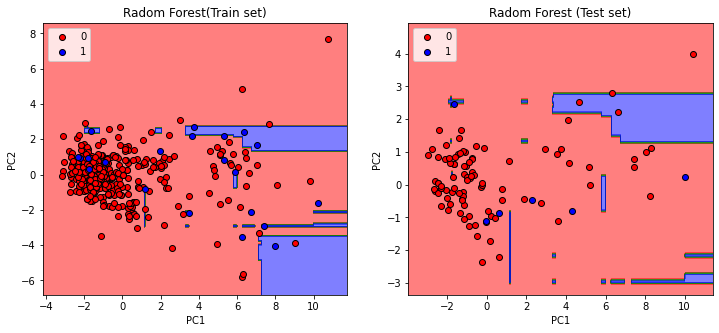

In [122]:
classification_visualize(X_train, y_train, X_test, y_test, classifier_RF, model = 'Radom Forest')   #using classification_visualize function

In [123]:
model_list = ["Logistic Regression",'KNN',"SVM-linear","SVM-poly","SVM-rbf", "Naive Bayes", " Decision Tree", "Random Forest"] # Generate the model list
classifier_all = [classifier_lin,classifier_knn,classifier_svm,classifier_svm_poly,classifier_svm_rbf,classifier_NB,classifier_dec,classifier_RF ] # Generate classifier list 
from tabulate import tabulate   #show in table
print(tabulate([accuracy_score_all], headers=model_list))   # Generate a table to list the model and its accuracy score

  Logistic Regression       KNN    SVM-linear    SVM-poly    SVM-rbf    Naive Bayes     Decision Tree    Random Forest
---------------------  --------  ------------  ----------  ---------  -------------  ----------------  ---------------
             0.938776  0.938776      0.938776    0.938776    0.94898       0.908163          0.867347         0.928571


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

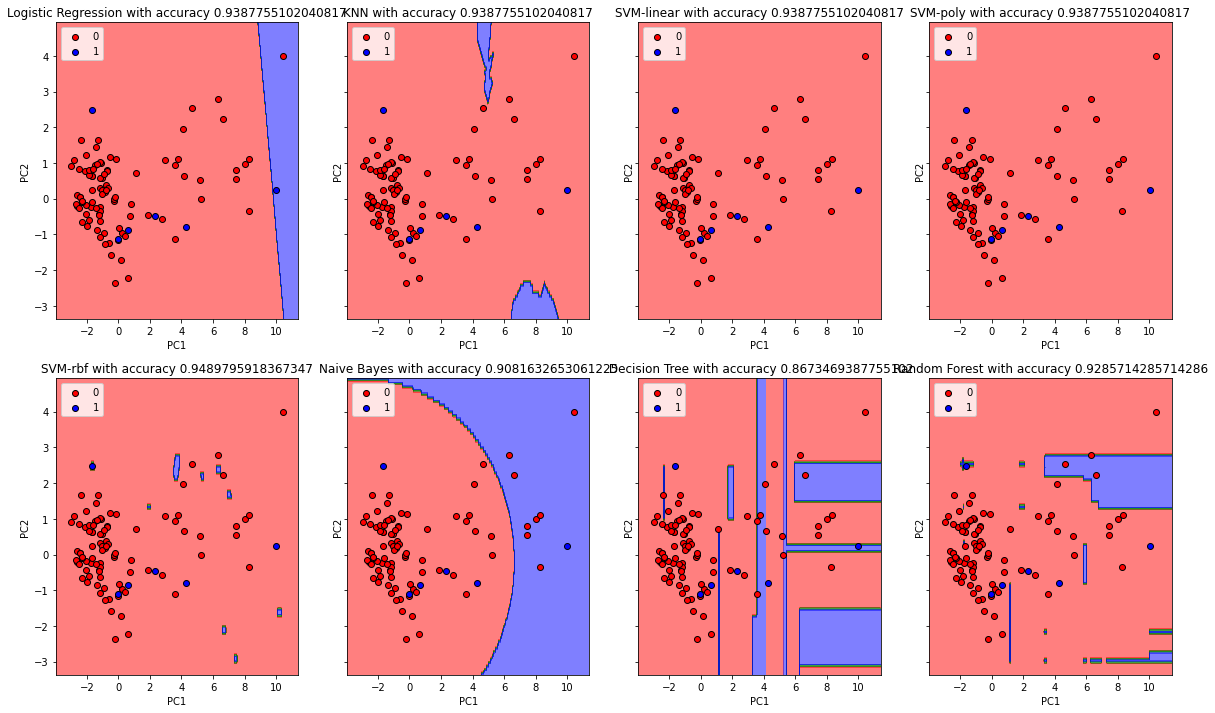

In [124]:
fig, axs = plt.subplots(2,4,figsize=(20,12), sharey=True)
X1_test, X2_test = np.meshgrid(np.arange(start = X_test[:, 0].min() - 1, stop = X_test[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_test[:, 1].min() - 1, stop = X_test[:, 1].max() + 1, step = 0.1))
for ind in range (0,2):
    for jnd in range (0,4):
        axs[ind,jnd].contourf(X1_test, X2_test, classifier_all[ind*4+jnd].predict(np.array([X1_test.ravel(), X2_test.ravel()]).T).reshape(X1_test.shape),
                 alpha = 0.5, cmap = ListedColormap(('red', 'green', 'blue')))
        axs[ind,jnd].set_xlim(X1_test.min(), X1_test.max())
        axs[ind,jnd].set_ylim(X2_test.min(), X2_test.max())
        for i, j in enumerate(np.unique(y_test)):
            axs[ind,jnd].scatter(X_test[y_test == j, 0], X_test[y_test== j, 1],marker='o',edgecolor='black',
                c = ListedColormap(('red', 'blue'))(i), label = j)
        axs[ind,jnd].set_title(model_list[ind*4+jnd]+' with accuracy '+str(accuracy_score_all[ind*4+jnd]))
        axs[ind,jnd].set_xlabel('PC1')
        axs[ind,jnd].set_ylabel('PC2')
        axs[ind,jnd].legend()
plt.show()

In [125]:
(max_accuracy,index) = max((v,i) for i,v in enumerate(accuracy_score_all))  # Find the maxmimum accurate score and the correponding model
print (max_accuracy,index)
classifier = classifier_all[index]            # Choose the best model
print("The best classification model is:" + model_list[index])  # Print the best model
print("The accuracte score is:" + str(max_accuracy))                   # Print the maximum accurate socre

0.9489795918367347 4
The best classification model is:SVM-rbf
The accuracte score is:0.9489795918367347


The prediction result is shown:


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

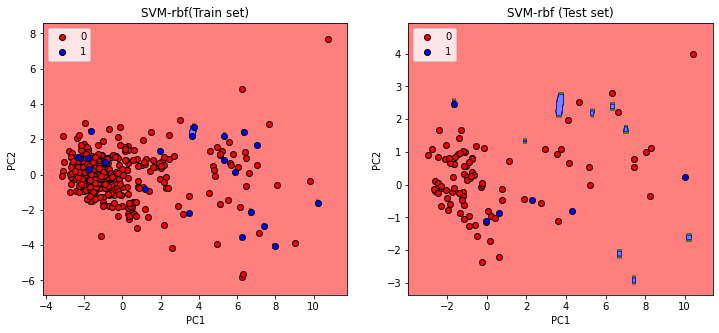

In [126]:
print('The prediction result is shown:')
classification_visualize(X_train, y_train, X_test, y_test, classifier, model = model_list[index])   #visualize the prediction result with the best model

**Prediction for other specific features**

In [127]:
predict_feature = [8.14, 8.7,	84.0,	52.0,	147.8,	4.48,	44.0,	20.0,	1.17,	0.285,	7.80,	0.758000,	6.534660,	0.06211]
print("pH is :" + str(predict_feature[0]) + "\n" + "DO is:" + str(predict_feature[1]) + "\n"
      "TDS is:" + str(predict_feature[2]) + "\n"+ "Alkalinity is:" + str(predict_feature[3]) + "\n"+
      "EC is:" + str(predict_feature[4]) + "\n"+ "Na is:" + str(predict_feature[5]) + "\n"+
      "Ca is:" + str(predict_feature[6]) + "\n"+ "Mg is:" + str(predict_feature[7]) + "\n"+
      "K is:" + str(predict_feature[8]) + "\n"+ "F is:" + str(predict_feature[9])+ "\n"+
      "Cl is:" + str(predict_feature[10]) + "\n"+ "Nitrate is:" + str(predict_feature[11])+ "\n"+
      "Sulphate is:" + str(predict_feature[12]) + "\n"+ "Phosphate is:" + str(predict_feature[13]))

#pH	DO	TDS	Alkalinity	EC	Na	Ca	Mg	K	F	Cl	Nitrate	Sulphate	Phosphate

pH is :8.14
DO is:8.7
TDS is:84.0
Alkalinity is:52.0
EC is:147.8
Na is:4.48
Ca is:44.0
Mg is:20.0
K is:1.17
F is:0.285
Cl is:7.8
Nitrate is:0.758
Sulphate is:6.53466
Phosphate is:0.06211


In [128]:
from tabulate import tabulate   #show in table
print(tabulate([["8.14", "8.7",	"84.0",	"52.0",	"147.8",	"4.48",	"44.0",	"20.0",	"1.17",	"0.285",	"7.80",	"0.758000",	"6.534660",	"0.06211"]], headers=["pH",	"DO",	"TDS",	"Alkalinity",	"EC",	"Na",	"Ca",	"Mg",	"K",	"F",	"Cl",	"Nitrate",	"Sulphate",	"Phosphate"]))

  pH    DO    TDS    Alkalinity     EC    Na    Ca    Mg     K      F    Cl    Nitrate    Sulphate    Phosphate
----  ----  -----  ------------  -----  ----  ----  ----  ----  -----  ----  ---------  ----------  -----------
8.14   8.7     84            52  147.8  4.48    44    20  1.17  0.285   7.8      0.758     6.53466      0.06211


In [129]:
X_feature = sc.transform ([predict_feature])  # Standardize the features
X_feature = pca. transform (X_feature)        # Reduce dimension

In [130]:
y_feature = classifier.predict(X_feature)
if y_feature == 0:
    print('The corresponding WPI is belong to low wpi(0):= SUITABLE FOR DRINKING' )
elif y_feature == 1:
    print('The corresponding WPI is belong to high wpi(1):=NOT SUITABLE FOR DRINKING' )

The corresponding WPI is belong to low wpi(0):= SUITABLE FOR DRINKING
